             woh        age
count  72.000000  72.000000
mean    0.855278  36.001389
std     0.121458  20.930438
min     0.460000   0.500000
25%     0.800000  18.250000
50%     0.870000  36.000000
75%     0.942500  53.750000
max     1.040000  71.500000
0     0.46
1     0.47
2     0.56
3     0.61
4     0.61
      ... 
67    0.99
68    0.97
69    1.01
70    0.99
71    1.04
Name: woh, Length: 72, dtype: float64


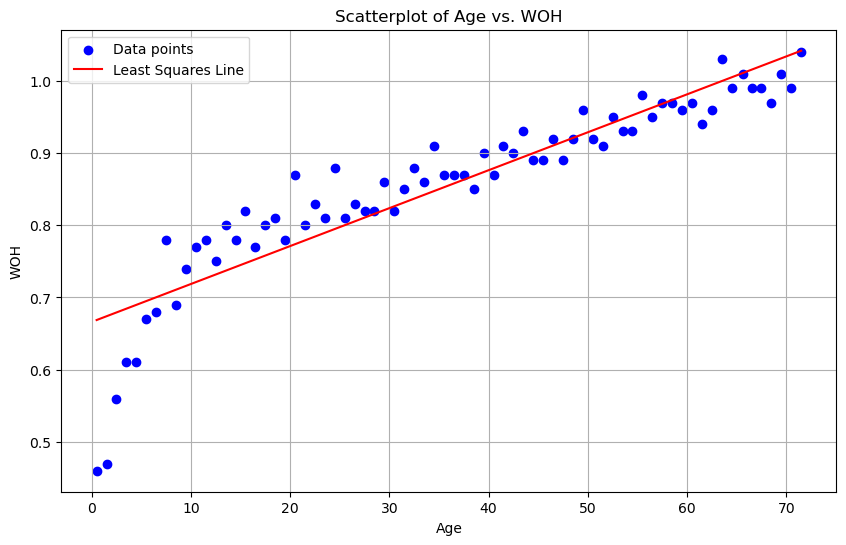

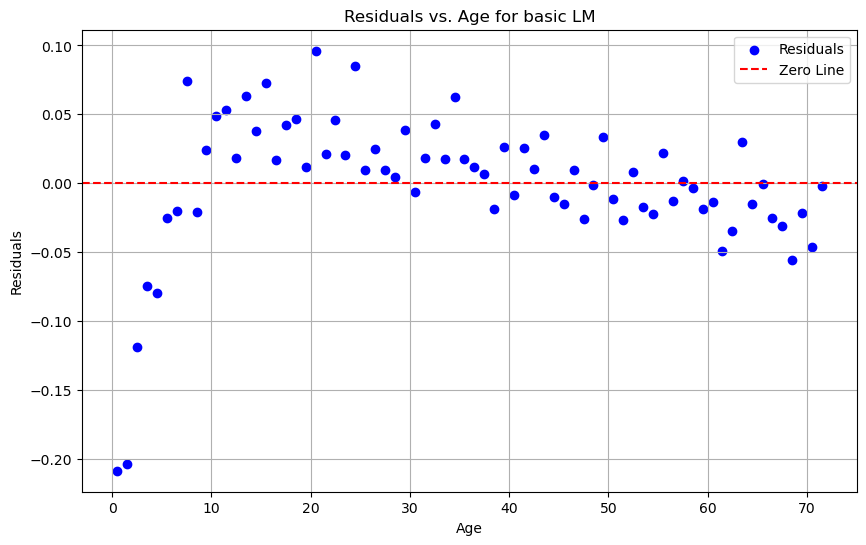

In [15]:
# Problem 2 Code
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def plot_regression_and_residuals(nutrition, model, model_name, X_with_intercept, y, x_label='Age', y_label='WOH'):
    # Plot WOH vs Age with the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(nutrition['age'], nutrition['woh'], color='blue', label='Data points')
    plt.plot(nutrition['age'], model.predict(X_with_intercept), color='red', label='Least Squares Line')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Scatterplot of {x_label} vs. {y_label} for {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate residuals
    residuals = y - model.predict(X_with_intercept)

    # Plot residuals vs Age
    plt.figure(figsize=(10, 6))
    plt.scatter(nutrition['age'], residuals, color='blue', label='Residuals')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
    plt.xlabel(x_label)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {x_label} for {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

nutrition = pd.read_csv('nutrition.csv')

# Display summary statistics
summary = nutrition.describe()
print(summary)

# Fit the SLR model using LinearRegression
X = nutrition['age'] # Predictor variable
y = nutrition['woh']  # Response variable
print(y)

# Add a constant to the predictor variable (intercept term)
X_with_intercept = sm.add_constant(X)
X_with_intercept.rename(columns={'const': 'WOH_intercept'}, inplace=True)
# Create and fit the model
model = sm.OLS(y, X_with_intercept).fit()

# Plot WOH vs Age
plot_regression_and_residuals(nutrition, model, "basic LM", X_with_intercept, y)

# The residuals plot indicates that the residuals are not randomly scattered around zero but instead show a clear dependence on age. This suggests that the residuals are not normally distributed around zero, which is a strong indication that the model is not an ideal fit for the data. Specifically, the residuals show a noticeable pattern, particularly for younger ages, where the model consistently underpredicts.

# Create the new variable age^2
nutrition['age2'] = nutrition['age'] ** 2

# Define the new predictor variables including age and age^2
X_new = nutrition[['age', 'age2']]

# Add a constant to the predictor variables (intercept term)
X_new_with_intercept = sm.add_constant(X_new)

# Create and fit the MLR model using OLS
model_new = sm.OLS(y, X_new_with_intercept).fit()